In [10]:
%%capture
!pip install ta keras-tuner seaborn matplotlib tensorflow

In [ ]:
import yfinance as yf
import pandas as pd
from ta.trend import sma_indicator, ema_indicator, MACD
from ta.momentum import RSIIndicator

# Define Snapchat ticker symbol
symbol = 'MSFT'

# Set time period for data retrieval
start_date = '2020-01-01'
end_date = '2025-01-31'

# Download data with auto_adjust=True by default
msft = yf.download(symbol, start=start_date, end=end_date)

# Calculate VWAP
msft['VWAP'] = (msft['Volume'] * (msft['High'] + msft['Low'] + msft['Close']) / 3).cumsum() / msft['Volume'].cumsum()

# Extract close series
close_series = msft['Close'].squeeze()

# Add technical indicators
msft['SMA_50'] = sma_indicator(close_series, window=50)
msft['EMA_50'] = ema_indicator(close_series, window=50)
msft['RSI'] = RSIIndicator(close_series).rsi()
macd = MACD(close_series)
msft['MACD'] = macd.macd()
msft['MACD_Signal'] = macd.macd_signal()
msft['MACD_Hist'] = macd.macd_diff()

# Use Close as proxy for Adjusted Close since auto_adjust=True by default
msft['Adjusted_Close'] = msft['Close']

# Market Cap approximation (close price * volume)
msft['Market_Cap'] = msft['Close'] * msft['Volume']

# Create Tomorrow's Close feature
msft['Tomorrow'] = msft['Close'].shift(-1)

# Select required features
desired_features = ['Close', 'Tomorrow', 'Low', 'Open', 'Volume', 'VWAP', 'Adjusted_Close', 'Market_Cap', 'SMA_50', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'High']
msft = msft[desired_features].dropna()

# Reset index for convenience
msft.reset_index(inplace=True)

# Display the first few rows of the dataset
print(msft.head())

# Save the dataset to a CSV file
msft.to_csv('microsoft.csv', index=False)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date       Close    Tomorrow         Low        Open    Volume  \
Ticker                   MSFT                    MSFT        MSFT      MSFT   
0      2020-03-13  152.028702  129.621170  134.703761  141.183865  92727400   
1      2020-03-16  129.621170  140.293701  129.219157  134.005051  87905900   
2      2020-03-17  140.293701  134.387878  129.219136  134.005030  81059800   
3      2020-03-18  134.387878  136.598984  129.238267  132.090655  81593200   
4      2020-03-19  136.598984  131.468506  133.047844  136.656412  85922700   

Price         VWAP Adjusted_Close    Market_Cap      SMA_50      EMA_50  \
Ticker                                                                    
0       159.759352     152.028702  1.409723e+10  161.256423  159.490975   
1       158.739045     129.621170  1.139447e+10  160.782382  158.319610   
2       157.971419     140.293701  1.137218e+10  160.559973  157.612711   
3       157.167972     134.387878  1.096514e+10  160.211620  156.701934

In [14]:
pip uninstall tensorflow 

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip cache purge

In [ ]:
pip install tensorflow

In [13]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split

ImportError: Traceback (most recent call last):
  File "c:\Users\karth\anaconda3\envs\DAB200\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [16]:
msft=pd.read_csv(r'https://github.com/sachinr-2911/Capstone_Project/raw/main/microsoft.csv')
msft.head()

,Date,Close,Tomorrow,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,High
0,NaN,MSFT,NaN,MSFT,MSFT,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MSFT
1,2020-03-13,152.0286865234375,129.621140,134.70374714006678,141.1838506811791,92727400,159.759351,152.028687,1.409722e+10,161.256421,159.490976,46.398595,-5.322767,-3.192345,-2.130422,154.97679851403672
2,2020-03-16,129.6211395263672,140.293671,129.2191262196637,134.00501978335495,87905900,158.739043,129.621140,1.139446e+10,160.782379,158.319610,36.896033,-6.777457,-3.909367,-2.868089,142.95464658961282
3,2020-03-17,140.29367065429688,134.387894,129.21910753838486,134.0050004101769,81059800,157.971416,140.293671,1.137218e+10,160.559969,157.612710,42.894892,-6.988564,-4.525207,-2.463358,141.18383971786494
4,2020-03-18,134.3878936767578,136.599014,129.2382818177403,132.09067046730803,81593200,157.167969,134.387894,1.096514e+10,160.211617,156.701933,40.595143,-7.545437,-5.129253,-2.416184,139.7481006393259


In [17]:
msft=msft.iloc[1:]
msft.head()

,Date,Close,Tomorrow,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,High
1,2020-03-13,152.0286865234375,129.621140,134.70374714006678,141.1838506811791,92727400,159.759351,152.028687,1.409722e+10,161.256421,159.490976,46.398595,-5.322767,-3.192345,-2.130422,154.97679851403672
2,2020-03-16,129.6211395263672,140.293671,129.2191262196637,134.00501978335495,87905900,158.739043,129.621140,1.139446e+10,160.782379,158.319610,36.896033,-6.777457,-3.909367,-2.868089,142.95464658961282
3,2020-03-17,140.29367065429688,134.387894,129.21910753838486,134.0050004101769,81059800,157.971416,140.293671,1.137218e+10,160.559969,157.612710,42.894892,-6.988564,-4.525207,-2.463358,141.18383971786494
4,2020-03-18,134.3878936767578,136.599014,129.2382818177403,132.09067046730803,81593200,157.167969,134.387894,1.096514e+10,160.211617,156.701933,40.595143,-7.545437,-5.129253,-2.416184,139.7481006393259
5,2020-03-19,136.59901428222656,131.468475,133.0478739539187,136.65644268232242,85922700,156.494880,136.599014,1.173696e+10,159.935170,155.913583,41.852124,-7.719359,-5.647274,-2.072085,143.7204133965548


In [18]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 1 to 1227
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1227 non-null   object 
 1   Close           1227 non-null   object 
 2   Tomorrow        1227 non-null   float64
 3   Low             1227 non-null   object 
 4   Open            1227 non-null   object 
 5   Volume          1227 non-null   object 
 6   VWAP            1227 non-null   float64
 7   Adjusted_Close  1227 non-null   float64
 8   Market_Cap      1227 non-null   float64
 9   SMA_50          1227 non-null   float64
 10  EMA_50          1227 non-null   float64
 11  RSI             1227 non-null   float64
 12  MACD            1227 non-null   float64
 13  MACD_Signal     1227 non-null   float64
 14  MACD_Hist       1227 non-null   float64
 15  High            1227 non-null   object 
dtypes: float64(10), object(6)
memory usage: 153.5+ KB


In [19]:
# Convert 'Date' to datetime
msft['Date'] = pd.to_datetime(msft['Date'], errors='coerce')

# Convert the rest of the 'object' columns to float (excluding 'Date')
columns_to_convert = msft.select_dtypes(include=['object']).columns

# Convert all 'object' columns to numeric (float), handling errors by coercing invalid entries
msft[columns_to_convert] = msft[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Check for any missing values and handle them (if necessary)
print(msft.isnull().sum())

Date              0
Close             0
Tomorrow          0
Low               0
Open              0
Volume            0
VWAP              0
Adjusted_Close    0
Market_Cap        0
SMA_50            0
EMA_50            0
RSI               0
MACD              0
MACD_Signal       0
MACD_Hist         0
High              0
dtype: int64


In [20]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 1 to 1227
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1227 non-null   datetime64[ns]
 1   Close           1227 non-null   float64       
 2   Tomorrow        1227 non-null   float64       
 3   Low             1227 non-null   float64       
 4   Open            1227 non-null   float64       
 5   Volume          1227 non-null   int64         
 6   VWAP            1227 non-null   float64       
 7   Adjusted_Close  1227 non-null   float64       
 8   Market_Cap      1227 non-null   float64       
 9   SMA_50          1227 non-null   float64       
 10  EMA_50          1227 non-null   float64       
 11  RSI             1227 non-null   float64       
 12  MACD            1227 non-null   float64       
 13  MACD_Signal     1227 non-null   float64       
 14  MACD_Hist       1227 non-null   float64       
 15  High

In [ ]:
msft.shape

(1228, 16)

In [ ]:
msft.isnull().sum()

,0
Date,0
Close,0
Tomorrow,0
Low,0
Open,0
Volume,0
VWAP,0
Adjusted_Close,0
Market_Cap,0
SMA_50,0


#SVM Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR  # Import the SVM Regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['High', 'Low', 'Open','Adjusted_Close', 'SMA_50', 'EMA_50']
target = "Close"  # Set target variable as "Close"

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(msft, test_size=0.2, random_state=1, shuffle=False)

# Initialize the SVM model (SVR for regression) without scaling
svm_model = SVR(kernel="rbf", C=1.0, gamma="scale")

# Train the SVM model
svm_model.fit(train[features], train[target])

# Predict on training and testing sets
#train_preds = svm_model.predict(train[features])
test_preds = svm_model.predict(test[features])

# Calculate R-squared and Mean Squared Error (MSE)
#train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)
#train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

# Print results
#print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
#print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")


Testing R-squared: -72.0848
Testing Mean Squared Error: 16982.7353


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

# --- Define your feature columns and target ---
features = ['High', 'Low', 'Open', 'Adjusted_Close', 'SMA_50', 'EMA_50']
target = "Close"

# --- Train-test split (80/20 without shuffling, preserving time order) ---
train_size = int(len(msft) * 0.8)
train = msft.iloc[:train_size]
test = msft.iloc[train_size:]

# --- Feature scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train[features])
X_test_scaled = scaler.transform(test[features])
y_train = train[target]
y_test = test[target]

# --- Hyperparameter grid for SVR ---
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5, 1]
}

# --- Use TimeSeriesSplit for cross-validation ---
tscv = TimeSeriesSplit(n_splits=5)

# --- GridSearchCV for hyperparameter tuning ---
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# --- Best model ---
best_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# --- Make predictions ---
test_preds = best_model.predict(X_test_scaled)

# --- Evaluate the model ---
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"\nTesting R-squared: {test_r2:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found: {'C': 100, 'epsilon': 0.01, 'gamma': 0.01}

Testing R-squared: 0.7873
Testing Mean Squared Error: 49.4361


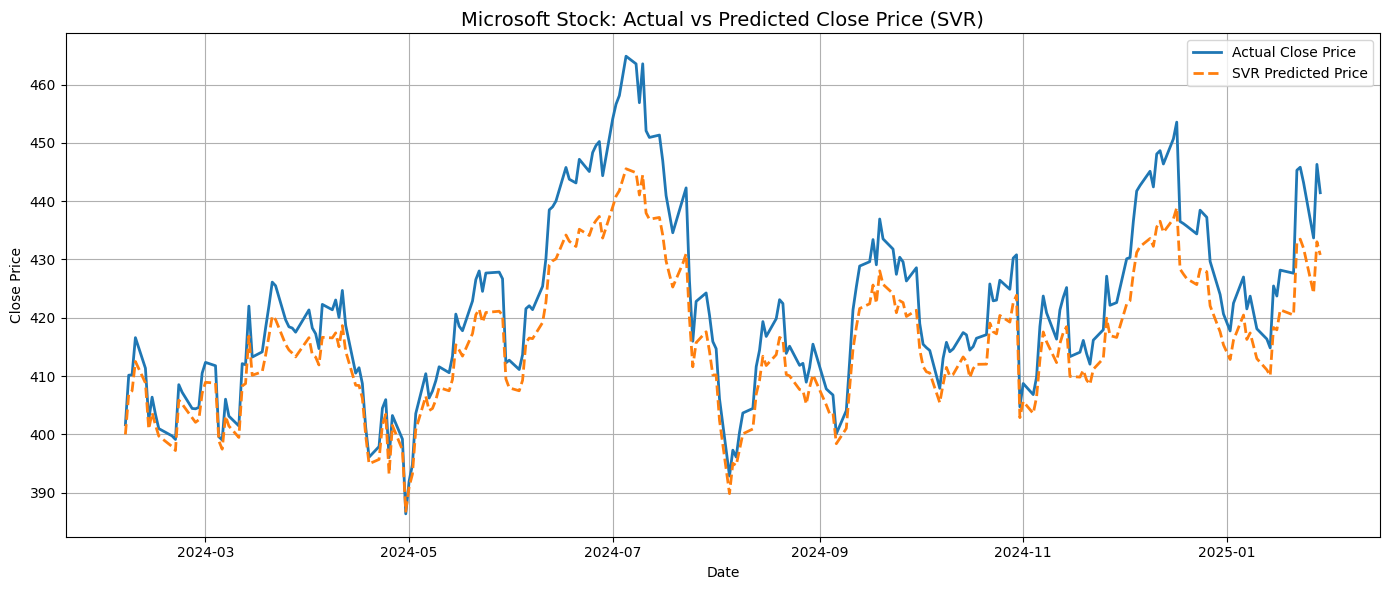

In [ ]:
# Ensure 'Date' column is datetime and set as index
msft['Date'] = pd.to_datetime(msft['Date'])
msft.set_index('Date', inplace=True)

# Re-do the split based on index (if not already)
train_size = int(len(msft) * 0.8)
train = msft.iloc[:train_size]
test = msft.iloc[train_size:]

# Plot with real dates on x-axis
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(test.index, y_test.values, label='Actual Close Price', linewidth=2)
plt.plot(test.index, test_preds, label='SVR Predicted Price', linestyle='--', linewidth=2)
plt.title('Microsoft Stock: Actual vs Predicted Close Price (SVR)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

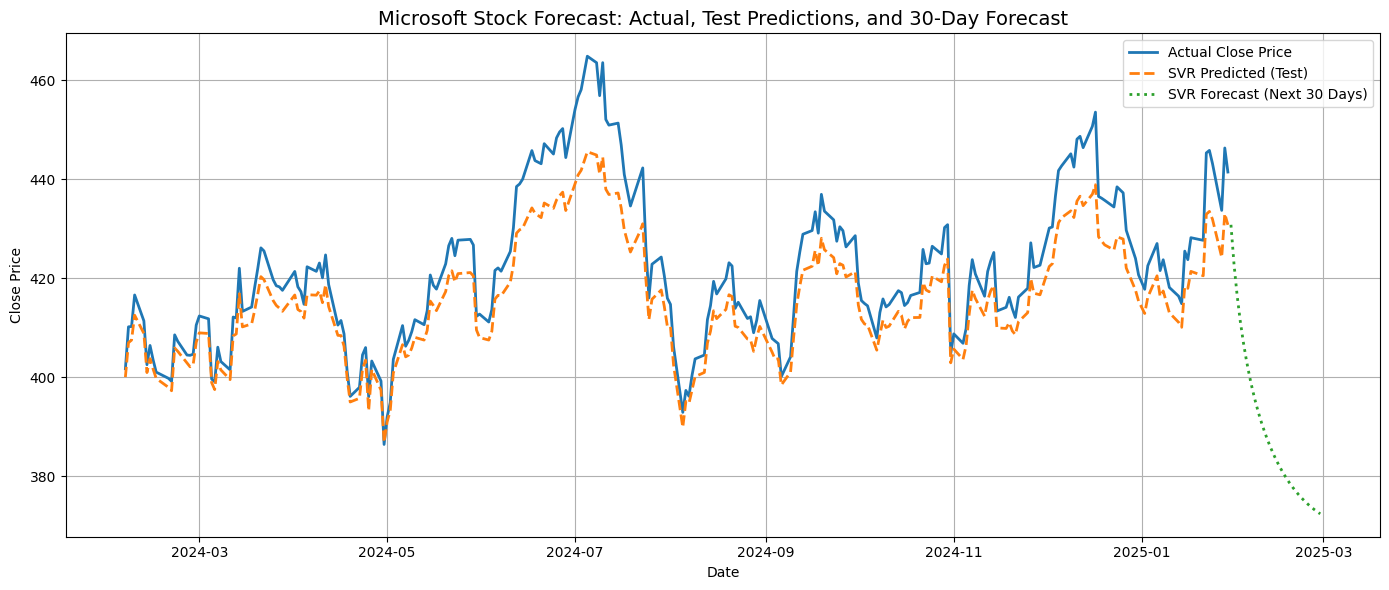

In [ ]:
import pandas as pd
from datetime import timedelta

# Copy last known test row
last_row = test[features].iloc[-1].copy()
last_date = test.index[-1]

# Store future predictions
future_dates = []
future_predictions = []

# Start forecasting 30 days ahead
for i in range(30):
    # Predict next close price
    scaled_input = scaler.transform([last_row])
    next_pred = best_model.predict(scaled_input)[0]

    # Save date and prediction
    next_date = last_date + timedelta(days=1)
    future_dates.append(next_date)
    future_predictions.append(next_pred)

    # Create the next input row based on assumed logic
    # Update features based on last values and prediction (simplified)
    last_row['Open'] = next_pred
    last_row['High'] = next_pred * 1.01  # assume 1% fluctuation
    last_row['Low'] = next_pred * 0.99
    last_row['Adjusted_Close'] = next_pred
    last_row['SMA_50'] = (last_row['SMA_50'] * 49 + next_pred) / 50
    last_row['EMA_50'] = (next_pred * (2 / (50 + 1))) + last_row['EMA_50'] * (1 - (2 / (50 + 1)))

    last_date = next_date  # move forward

# --- Plot the forecast ---
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(test.index, y_test.values, label='Actual Close Price', linewidth=2)
plt.plot(test.index, test_preds, label='SVR Predicted (Test)', linestyle='--', linewidth=2)
plt.plot(future_dates, future_predictions, label='SVR Forecast (Next 30 Days)', linestyle=':', linewidth=2)
plt.title('Microsoft Stock Forecast: Actual, Test Predictions, and 30-Day Forecast', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features and target
features = ['High', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50']
target = 'Close'

# Split the data: 70% training, 10% validation, 20% testing
train, temp = train_test_split(msft, test_size=0.3, random_state=1, shuffle=False)
val, test = train_test_split(temp, test_size=2/3, random_state=1, shuffle=False)

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=1)

# Train the model
rf_model.fit(train[features], train[target])

test_preds = rf_model.predict(test[features])

test_r2 = r2_score(test[target], test_preds)

test_mse = mean_squared_error(test[target], test_preds)

# Print the results
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}")



Testing R-squared: -22.1386
Testing MSE: 5376.7258


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Testing R-squared: -1.5458
Testing MSE: 591.5706


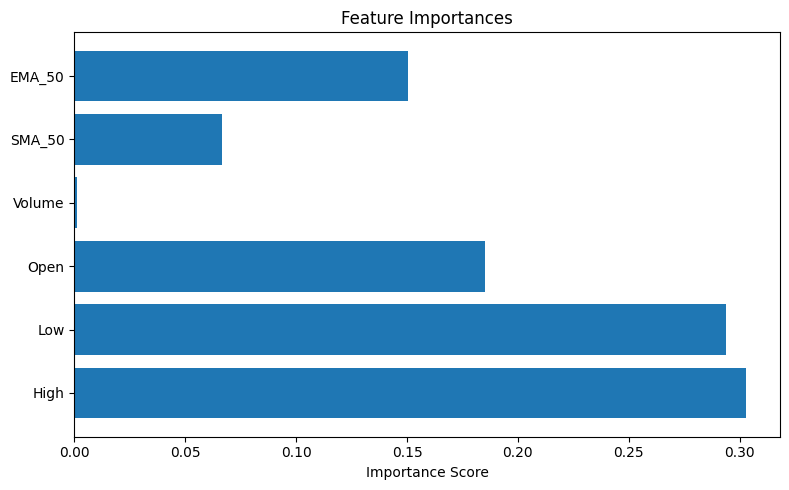

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# --- Split into train (70%), val (10%), test (20%) ---
train, temp = train_test_split(msft, test_size=0.3, random_state=1, shuffle=False)
val, test = train_test_split(temp, test_size=2/3, random_state=1, shuffle=False)

# --- Define features and target ---
features = ['High', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50']
target = 'Close'

# --- Combine train + val for grid search ---
X_trainval = pd.concat([train, val])[features]
y_trainval = pd.concat([train, val])[target]

# --- Define parameter grid ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# --- Use TimeSeriesSplit ---
tscv = TimeSeriesSplit(n_splits=5)

# --- Grid search for hyperparameter tuning ---
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=1),
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_trainval, y_trainval)

# --- Best model and results ---
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# --- Predict on test set ---
X_test = test[features]
y_test = test[target]
test_preds = best_rf.predict(X_test)

test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"Testing R-squared: {test_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# --- Optional: plot feature importance ---
importances = best_rf.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# --- Split into train (70%), val (10%), test (20%) ---
train, temp = train_test_split(msft, test_size=0.3, random_state=1, shuffle=False)
val, test = train_test_split(temp, test_size=2/3, random_state=1, shuffle=False)

# --- Define features and target ---
features = ['High', 'Low', 'Open', 'EMA_50']
target = 'Close'

# --- Combine train + val for grid search ---
X_trainval = pd.concat([train, val])[features]
y_trainval = pd.concat([train, val])[target]

# --- Define parameter grid ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# --- Use TimeSeriesSplit ---
tscv = TimeSeriesSplit(n_splits=5)

# --- Grid search for hyperparameter tuning ---
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=1),
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_trainval, y_trainval)

# --- Best model and results ---
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# --- Predict on test set ---
X_test = test[features]
y_test = test[target]
test_preds = best_rf.predict(X_test)

test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"Testing R-squared: {test_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Testing R-squared: -1.4287
Testing MSE: 564.3468


#Sarima and Arima

In [21]:
import pandas as pd

url = 'https://github.com/sachinr-2911/Capstone_Project/raw/main/microsoft.csv'
df_arima = pd.read_csv(url)

df_arima= df_arima.iloc[1:]
# Preview the data
df_arima.head()

,Date,Close,Tomorrow,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,High
1,2020-03-13,152.0286865234375,129.621140,134.70374714006678,141.1838506811791,92727400,159.759351,152.028687,1.409722e+10,161.256421,159.490976,46.398595,-5.322767,-3.192345,-2.130422,154.97679851403672
2,2020-03-16,129.6211395263672,140.293671,129.2191262196637,134.00501978335495,87905900,158.739043,129.621140,1.139446e+10,160.782379,158.319610,36.896033,-6.777457,-3.909367,-2.868089,142.95464658961282
3,2020-03-17,140.29367065429688,134.387894,129.21910753838486,134.0050004101769,81059800,157.971416,140.293671,1.137218e+10,160.559969,157.612710,42.894892,-6.988564,-4.525207,-2.463358,141.18383971786494
4,2020-03-18,134.3878936767578,136.599014,129.2382818177403,132.09067046730803,81593200,157.167969,134.387894,1.096514e+10,160.211617,156.701933,40.595143,-7.545437,-5.129253,-2.416184,139.7481006393259
5,2020-03-19,136.59901428222656,131.468475,133.0478739539187,136.65644268232242,85922700,156.494880,136.599014,1.173696e+10,159.935170,155.913583,41.852124,-7.719359,-5.647274,-2.072085,143.7204133965548


In [64]:
# Acquire data from yfinance

symbol = 'MSFT'

df = yf.download(symbol, period="max", interval="1d")
df.to_csv("GOOG.csv")

[*********************100%***********************]  1 of 1 completed


In [65]:
GOOG = pd.read_csv("GOOG.csv")

In [67]:
GOOG = GOOG[2:]
GOOG = GOOG.reset_index()
GOOG = GOOG.drop(columns=["index"])
GOOG = GOOG.rename(columns={"Price":"Date"})
columns_to_convert = ["Close", "High", "Low", "Open"]
GOOG[columns_to_convert] = GOOG[columns_to_convert].astype(float)
GOOG['Date'] = pd.to_datetime(GOOG['Date'])
GOOG['Volume'] = GOOG['Volume'].astype(int)
GOOG.head()

,Date,Close,High,Low,Open,Volume
0,1986-03-13,0.059707,0.062373,0.054376,0.054376,1031788800
1,1986-03-14,0.061839,0.062906,0.059707,0.059707,308160000
2,1986-03-17,0.062906,0.063439,0.061839,0.061839,133171200
3,1986-03-18,0.061306,0.063439,0.060773,0.062906,67766400
4,1986-03-19,0.060240,0.061839,0.059707,0.061306,47894400


In [68]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9849 entries, 0 to 9848
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9849 non-null   datetime64[ns]
 1   Close   9849 non-null   float64       
 2   High    9849 non-null   float64       
 3   Low     9849 non-null   float64       
 4   Open    9849 non-null   float64       
 5   Volume  9849 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 423.3 KB


In [69]:
GOOG.tail()

,Date,Close,High,Low,Open,Volume
9844,2025-04-08,354.559998,373.649994,350.250000,368.260010,35868900
9845,2025-04-09,390.489990,393.230011,353.100006,353.540009,50199700
9846,2025-04-10,381.350006,383.899994,367.799988,382.059998,38024400
9847,2025-04-11,388.450012,390.049988,378.890015,380.640015,23828700
9848,2025-04-14,387.809998,394.640015,384.209991,393.220001,18941747


In [70]:
df = GOOG[(GOOG['Date'] >= datetime.datetime(2020, 1, 1)) & (GOOG['Date'] <= datetime.datetime(2025, 1, 31))].reset_index(drop=True)
# df = GOOG[GOOG['Date'] >= datetime.datetime(2020, 1, 1)].reset_index(drop=True)

prices = df[['Close','Date']]
prices = prices.set_index('Date')

actual = GOOG[GOOG['Date']> datetime.datetime(2025, 1, 31)].reset_index(drop=True)

In [36]:
pip install -q statsmodels

Note: you may need to restart the kernel to use updated packages.


In [71]:
from statsmodels.tsa.stattools import acf, pacf

#identifying p
x_acf = acf(prices['Close'], nlags = 40)
filtered_values = x_acf[x_acf > 0.95]
print("Based on acf we can identify p value as :",len(filtered_values))

Based on acf we can identify p value as : 15


In [82]:
filtered_values

array([1.        , 0.99630412, 0.99285499, 0.98916908, 0.98539734,
       0.98176648, 0.97792891, 0.97425178, 0.97055036, 0.96721192,
       0.96360732, 0.96026078, 0.95701201, 0.95389998, 0.95073235])

In [72]:
x_pacf = pacf(prices)
x_pacf

#maybe 2

array([ 1.        ,  0.99708431,  0.04019869, -0.0411573 , -0.02040668,
        0.02230813, -0.03470412,  0.0209902 , -0.00242261,  0.06023168,
       -0.04585564,  0.03693689,  0.01780364,  0.02531334, -0.01940522,
       -0.01313953,  0.01432716,  0.00254292,  0.01774828,  0.009504  ,
        0.03007545, -0.02861854, -0.03317281,  0.00800377,  0.00557942,
        0.00884888,  0.02295307,  0.0345002 , -0.02481601, -0.01726239,
       -0.05371569,  0.006818  ])

Text(0.5, 1.0, 'Differenced Once')

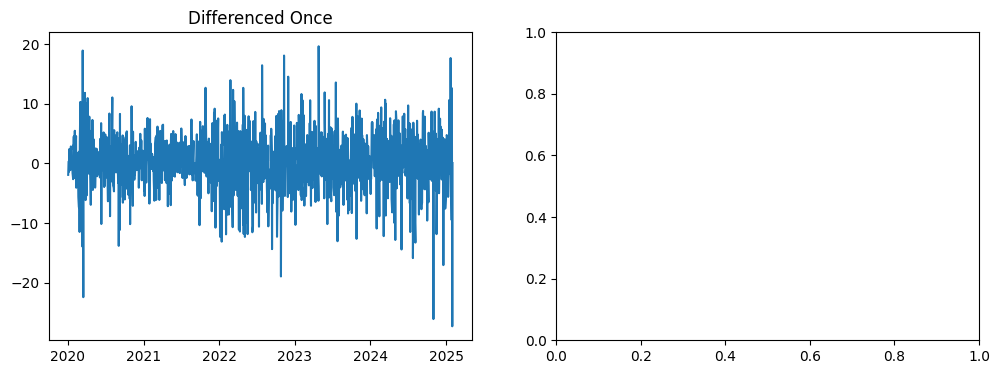

In [73]:
diff = prices.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(diff)
ax1.set_title('Differenced Once')

In [74]:
modelpredictions = []

In [75]:
training_data = list(prices['Close'])

In [76]:
from statsmodels.tsa.arima.model import ARIMA

In [84]:
order=(len(filtered_values),1,1)

In [85]:
order

(15, 1, 1)

In [ ]:

for i in range(len(actual)):
  model = ARIMA(training_data, order=(len(filtered_values),1,1))
  model_fit = model.fit()
  forecast = model_fit.forecast()
  yhat = list(forecast)[0]
  modelpredictions.append(yhat)
  actual_test = list(actual['Close'])[i]
  training_data.append(actual_test)

In [79]:
modelpredictions

[414.7465194383454,
 412.3322835130109,
 409.7006358916764,
 411.5648686983984,
 414.84535762086574,
 410.3701185861971,
 412.36900178637455,
 408.4663906333696,
 409.5630202412164,
 409.96182972107925,
 408.63807419398296,
 408.61391654416695,
 413.92706508533996,
 415.17255657880696,
 408.93527450509765,
 404.9758495060651,
 398.43350395349495,
 399.88204205534527,
 392.49596175111327,
 397.13848246635075,
 389.243506777588,
 389.4031981548726,
 399.16704335314796,
 397.12589240288145,
 393.0496763834171,
 382.8403458070196,
 380.62636866555897,
 383.3217074020061,
 378.406085116646,
 387.4680911395167,
 390.1781199622796,
 383.315618148554,
 387.6230368081095,
 386.303910672883,
 390.785543718997,
 393.50198474427964,
 394.701246536901,
 390.73966852457056,
 391.03532045857094,
 378.8296526089217,
 376.52970050585986,
 381.37743465846074,
 382.30646734270323,
 373.19901203217694,
 361.9340057506539,
 358.2917553059408,
 355.1123730005283,
 387.28132641210334,
 380.193881392023,
 388

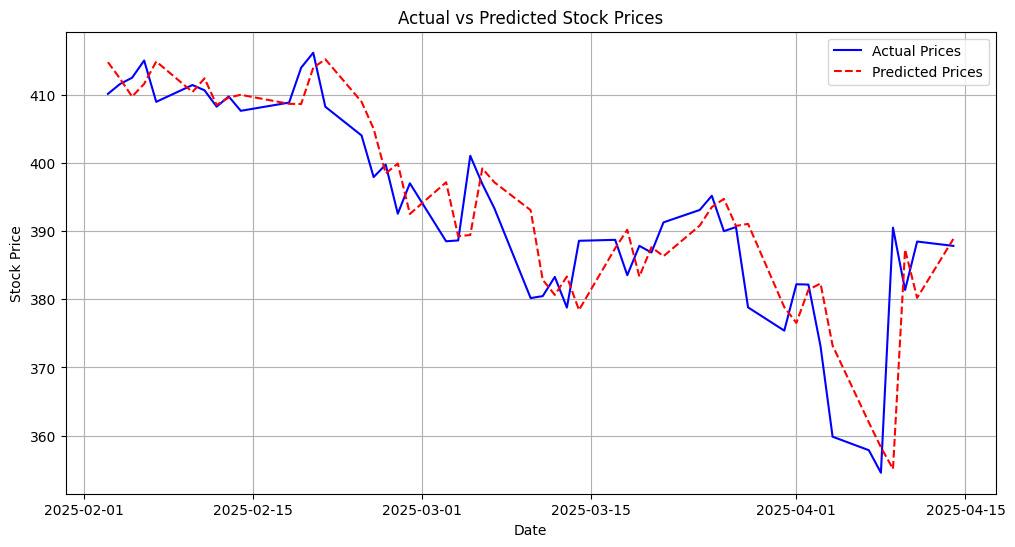

In [80]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(actual['Date'], actual['Close'], label="Actual Prices", color='blue')
plt.plot(actual['Date'], modelpredictions, label="Predicted Prices", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(actual['Close'], modelpredictions)

0.741244610781679

[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2042 non-null   datetime64[ns]
 1   Close   2042 non-null   float64       
 2   High    2042 non-null   float64       
 3   Low     2042 non-null   float64       
 4   Open    2042 non-null   float64       
 5   Volume  2042 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 87.9 KB
Based on acf we can identify p value as : 23


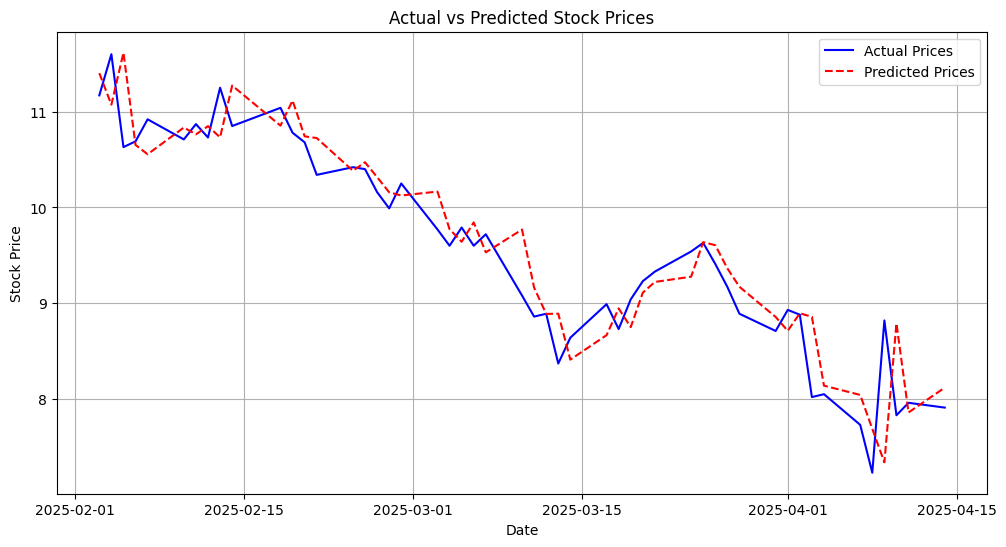

0.856579764811853

In [86]:
# Acquire data from yfinance

symbol = 'SNAP'

df = yf.download(symbol, period="max", interval="1d")
df.to_csv("GOOG.csv")

GOOG = pd.read_csv("GOOG.csv")
GOOG = GOOG[2:]
GOOG = GOOG.reset_index()
GOOG = GOOG.drop(columns=["index"])
GOOG = GOOG.rename(columns={"Price":"Date"})
columns_to_convert = ["Close", "High", "Low", "Open"]
GOOG[columns_to_convert] = GOOG[columns_to_convert].astype(float)
GOOG['Date'] = pd.to_datetime(GOOG['Date'])
GOOG['Volume'] = GOOG['Volume'].astype(int)
GOOG.head()
GOOG.info()
df = GOOG[(GOOG['Date'] >= datetime.datetime(2020, 1, 1)) & (GOOG['Date'] <= datetime.datetime(2025, 1, 31))].reset_index(drop=True)
# df = GOOG[GOOG['Date'] >= datetime.datetime(2020, 1, 1)].reset_index(drop=True)

prices = df[['Close','Date']]
prices = prices.set_index('Date')

actual = GOOG[GOOG['Date']> datetime.datetime(2025, 1, 31)].reset_index(drop=True)
from statsmodels.tsa.stattools import acf, pacf

#identifying p
x_acf = acf(prices['Close'], nlags = 40)
filtered_values = x_acf[x_acf > 0.95]
print("Based on acf we can identify p value as :",len(filtered_values))
x_pacf = pacf(prices)
x_pacf

#maybe 2
modelpredictions = []
training_data = list(prices['Close'])
from statsmodels.tsa.arima.model import ARIMA

for i in range(len(actual)):
  model = ARIMA(training_data, order=(len(filtered_values),1,1))
  model_fit = model.fit()
  forecast = model_fit.forecast()
  yhat = list(forecast)[0]
  modelpredictions.append(yhat)
  actual_test = list(actual['Close'])[i]
  training_data.append(actual_test)
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(actual['Date'], actual['Close'], label="Actual Prices", color='blue')
plt.plot(actual['Date'], modelpredictions, label="Predicted Prices", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()
from sklearn.metrics import r2_score, mean_squared_error

r2_score(actual['Close'], modelpredictions)

In [ ]:
df_info = df_arima.info()
df_head = df_arima.head()
df_describe = df_arima.describe()

df_head, df_info, df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 1 to 1227
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1227 non-null   object 
 1   Close           1227 non-null   object 
 2   Tomorrow        1227 non-null   float64
 3   Low             1227 non-null   object 
 4   Open            1227 non-null   object 
 5   Volume          1227 non-null   object 
 6   VWAP            1227 non-null   float64
 7   Adjusted_Close  1227 non-null   float64
 8   Market_Cap      1227 non-null   float64
 9   SMA_50          1227 non-null   float64
 10  EMA_50          1227 non-null   float64
 11  RSI             1227 non-null   float64
 12  MACD            1227 non-null   float64
 13  MACD_Signal     1227 non-null   float64
 14  MACD_Hist       1227 non-null   float64
 15  High            1227 non-null   object 
dtypes: float64(10), object(6)
memory usage: 153.5+ KB


(         Date               Close    Tomorrow                 Low  \
 1  2020-03-13   152.0286865234375  129.621140  134.70374714006678   
 2  2020-03-16   129.6211395263672  140.293671   129.2191262196637   
 3  2020-03-17  140.29367065429688  134.387894  129.21910753838486   
 4  2020-03-18   134.3878936767578  136.599014   129.2382818177403   
 5  2020-03-19  136.59901428222656  131.468475   133.0478739539187   
 
                  Open    Volume        VWAP  Adjusted_Close    Market_Cap  \
 1   141.1838506811791  92727400  159.759351      152.028687  1.409722e+10   
 2  134.00501978335495  87905900  158.739043      129.621140  1.139446e+10   
 3   134.0050004101769  81059800  157.971416      140.293671  1.137218e+10   
 4  132.09067046730803  81593200  157.167969      134.387894  1.096514e+10   
 5  136.65644268232242  85922700  156.494880      136.599014  1.173696e+10   
 
        SMA_50      EMA_50        RSI      MACD  MACD_Signal  MACD_Hist  \
 1  161.256421  159.490976  46.39

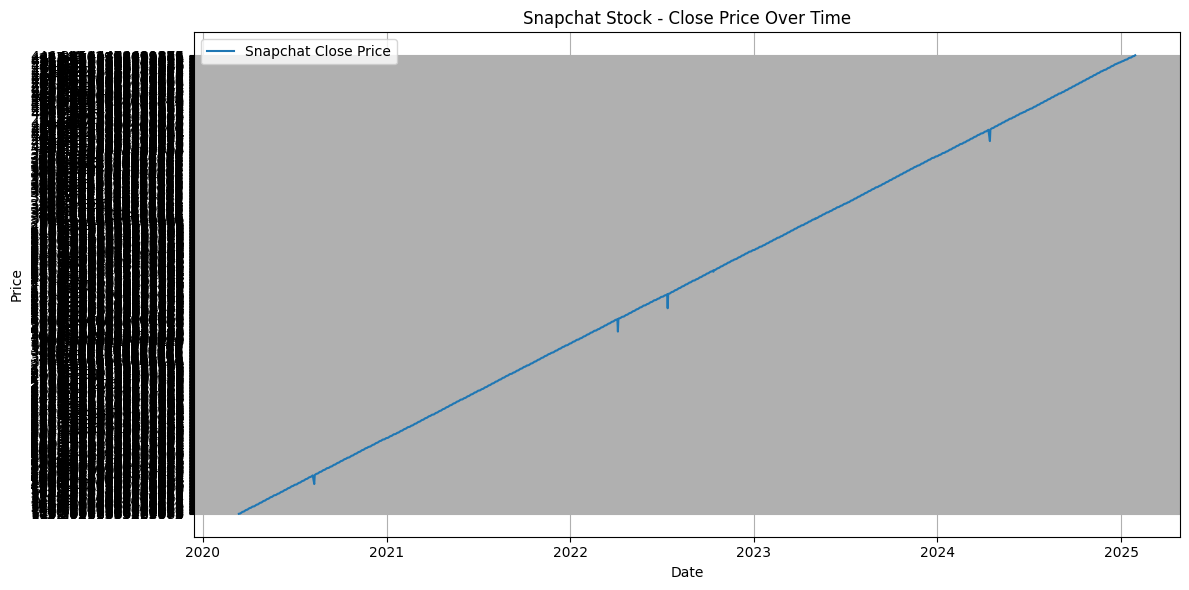

{'ADF Statistic': np.float64(-1.0672576700897372),
 'p-value': np.float64(0.727951037582096),
 'Used Lag': 2,
 'Number of Observations': 1224,
 'Critical Values': {'1%': np.float64(-3.4357038129673962),
  '5%': np.float64(-2.8639042041471887),
  '10%': np.float64(-2.5680287376916997)},
 'Stationary?': 'No'}

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Convert Date to datetime and set as index
df_arima['Date'] = pd.to_datetime(df_arima['Date'])
df_arima.set_index('Date', inplace=True)

# Step 2: Extract the target time series (we'll use 'Close' for now)
ts = df_arima['Close']

# Step 3: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Snapchat Close Price')
plt.title('Snapchat Stock - Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Perform Augmented Dickey-Fuller test
adf_result = adfuller(ts)

adf_summary = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Used Lag': adf_result[2],
    'Number of Observations': adf_result[3],
    'Critical Values': adf_result[4],
    'Stationary?': 'Yes' if adf_result[1] < 0.05 else 'No'
}

adf_summary


In [ ]:
# Convert to numeric (if needed)
ts = pd.to_numeric(ts, errors='coerce')  # This will turn non-numeric values into NaN

# Drop NaN values created by coercion (if any)
ts = ts.dropna()

# Now perform differencing
ts_diff = ts.diff().dropna()


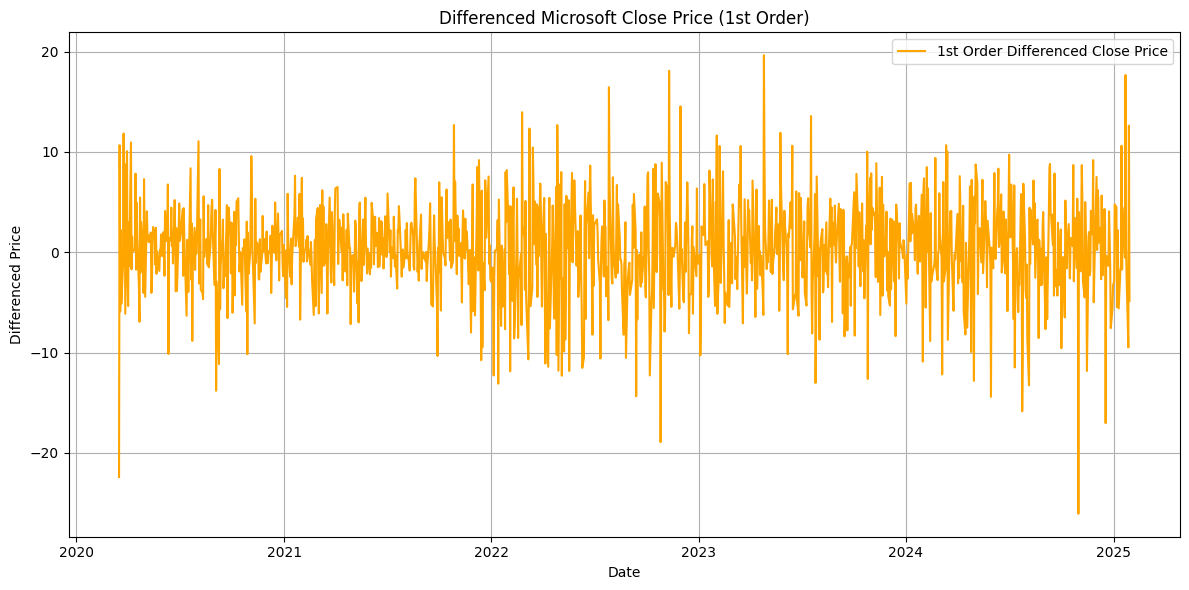

{'ADF Statistic': np.float64(-26.712163836099013),
 'p-value': 0.0,
 'Used Lag': 1,
 'Number of Observations': 1224,
 'Critical Values': {'1%': np.float64(-3.4357038129673962),
  '5%': np.float64(-2.8639042041471887),
  '10%': np.float64(-2.5680287376916997)},
 'Stationary?': 'Yes'}

In [ ]:
# Step 5: First-order differencing to make the series stationary
ts_diff = ts.diff().dropna()

# Plot differenced series
plt.figure(figsize=(12, 6))
plt.plot(ts_diff, label='1st Order Differenced Close Price', color='orange')
plt.title('Differenced Microsoft Close Price (1st Order)')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ADF test on differenced series
adf_diff_result = adfuller(ts_diff)

adf_diff_summary = {
    'ADF Statistic': adf_diff_result[0],
    'p-value': adf_diff_result[1],
    'Used Lag': adf_diff_result[2],
    'Number of Observations': adf_diff_result[3],
    'Critical Values': adf_diff_result[4],
    'Stationary?': 'Yes' if adf_diff_result[1] < 0.05 else 'No'
}

adf_diff_summary


In [ ]:
# Split data: 85% train, 15% test (chronologically)
split_index = int(len(ts) * 0.85)
ts_train = ts.iloc[:split_index]
ts_test = ts.iloc[split_index:]

# Confirm the split sizes
train_len = len(ts_train)
test_len = len(ts_test)

train_len, test_len, ts_train.tail(), ts_test.head()


(1042,
 185,
 Date
 2024-04-26    403.241425
 2024-04-29    399.202240
 2024-04-30    386.380127
 2024-05-01    391.947632
 2024-05-02    394.825653
 Name: Close, dtype: float64,
 Date
 2024-05-03    403.578827
 2024-05-06    410.406677
 2024-05-07    406.238495
 2024-05-08    407.429443
 2024-05-09    409.195923
 Name: Close, dtype: float64)

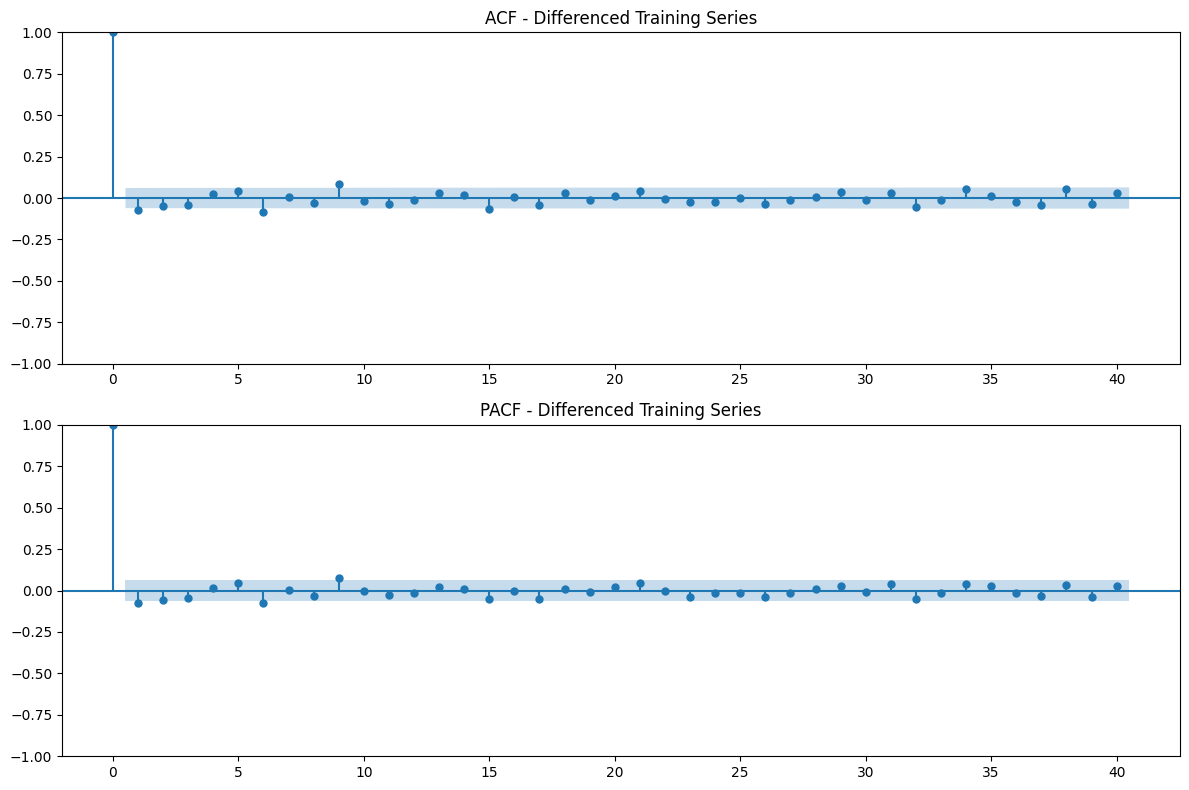

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use differenced training data for ACF/PACF
ts_train_diff = ts_train.diff().dropna()

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(ts_train_diff, lags=40, ax=ax[0])
ax[0].set_title('ACF - Differenced Training Series')

plot_pacf(ts_train_diff, lags=40, ax=ax[1])
ax[1].set_title('PACF - Differenced Training Series')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

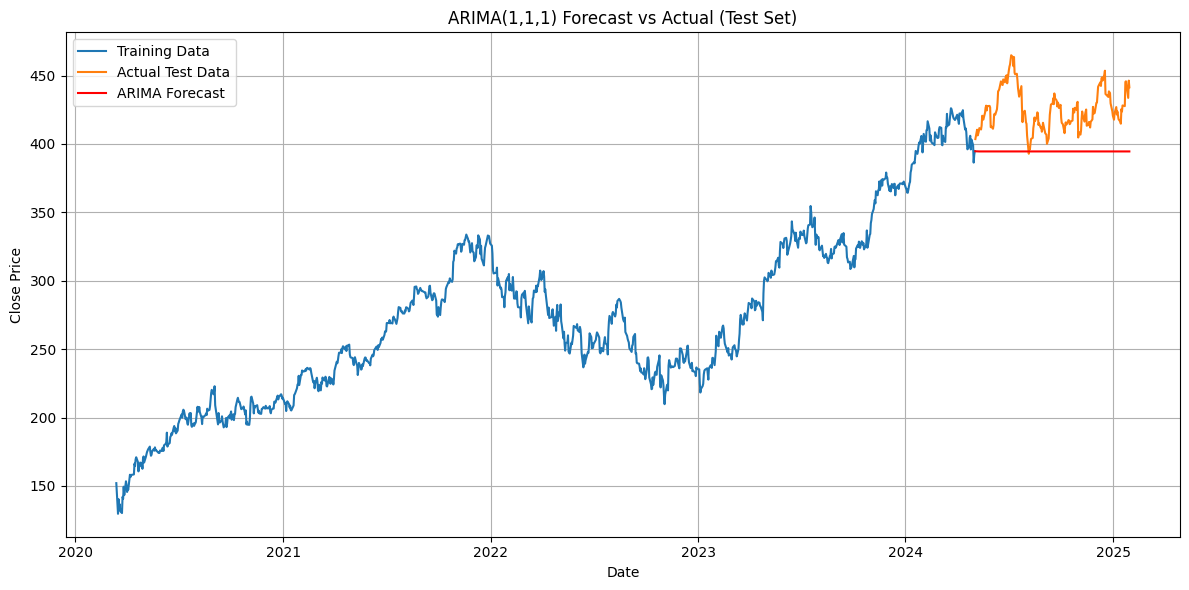

(1183.023017611935, 31.100036513304943)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1) on training data
arima_model = ARIMA(ts_train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast for the same length as test set
arima_forecast = arima_result.forecast(steps=len(ts_test))

# Plot actual vs forecasted
plt.figure(figsize=(12, 6))
plt.plot(ts_train, label='Training Data')
plt.plot(ts_test, label='Actual Test Data')
plt.plot(ts_test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA(1,1,1) Forecast vs Actual (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_arima = mean_squared_error(ts_test, arima_forecast)
mae_arima = mean_absolute_error(ts_test, arima_forecast)

mse_arima, mae_arima


In [ ]:
from sklearn.metrics import r2_score

# Calculate R² score for ARIMA predictions
r2_arima = r2_score(ts_test, arima_forecast)

r2_arima


-4.454499557066478

In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


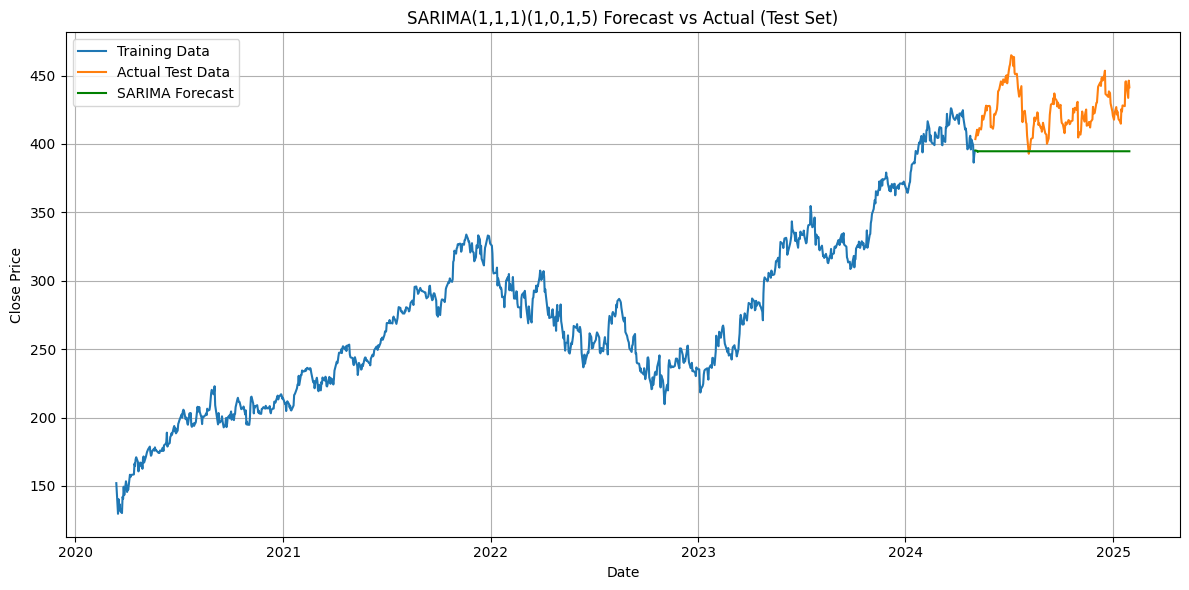

(1175.3016420108345, 30.97693771223061)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(1,1,1)(1,0,1,5)
sarima_model = SARIMAX(ts_train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 5))
sarima_result = sarima_model.fit(disp=False)

# Forecast for the length of the test set
sarima_forecast = sarima_result.forecast(steps=len(ts_test))

# Plot actual vs forecasted
plt.figure(figsize=(12, 6))
plt.plot(ts_train, label='Training Data')
plt.plot(ts_test, label='Actual Test Data')
plt.plot(ts_test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA(1,1,1)(1,0,1,5) Forecast vs Actual (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate performance
mse_sarima = mean_squared_error(ts_test, sarima_forecast)
mae_sarima = mean_absolute_error(ts_test, sarima_forecast)

mse_sarima, mae_sarima


In [ ]:
from sklearn.metrics import r2_score

# Calculate R² score for ARIMA predictions
r2_sarima = r2_score(ts_test, sarima_forecast)

r2_sarima


-4.418899032673331

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the re-uploaded dataset
url = 'https://github.com/sachinr-2911/Capstone_Project/raw/main/microsoft.csv'
df= pd.read_csv(url)

df = df.iloc[1:]
# Preview the data
df.head()
# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# Convert 'Close' column to numeric (force non-numeric to NaN)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop rows with NaN in 'Close'
df = df.dropna(subset=['Close'])

# Proceed with log transformation
ts = df['Close']
ts_log = np.log(ts)


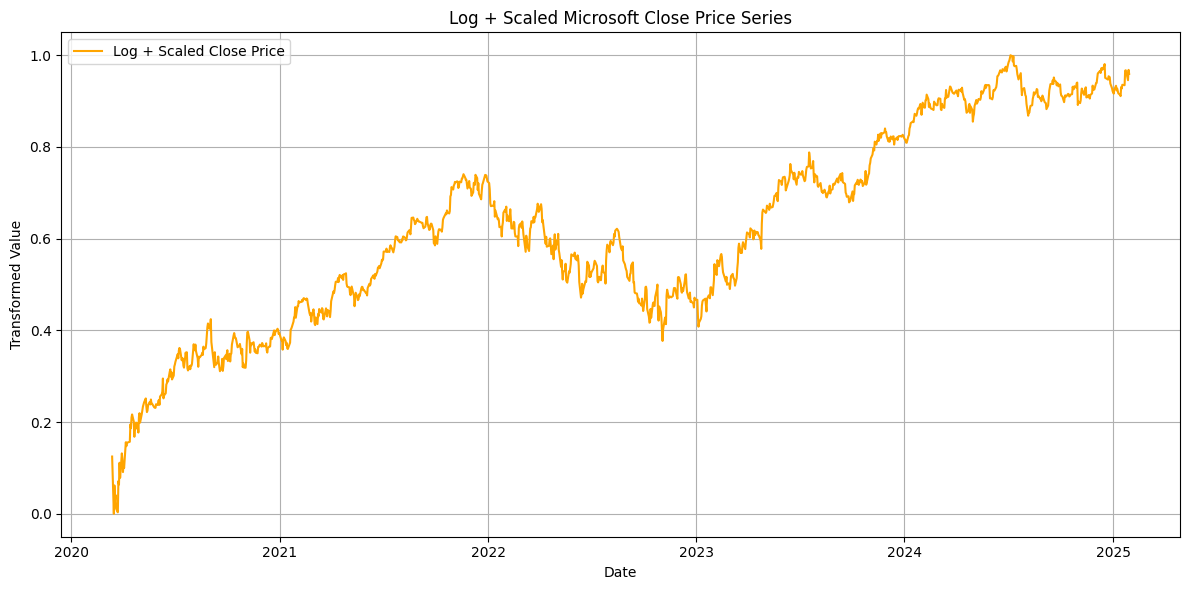

(Date
 2020-03-13    0.124855
 2020-03-16    0.000000
 2020-03-17    0.061954
 2020-03-18    0.028278
 2020-03-19    0.041057
 dtype: float64,
 Date
 2024-05-03    0.889318
 2024-05-06    0.902455
 2024-05-07    0.894462
 2024-05-08    0.896754
 2024-05-09    0.900142
 dtype: float64)

In [ ]:
# Step 2: MinMax scaling
scaler = MinMaxScaler(feature_range=(0, 1))
ts_log_scaled = pd.Series(
    scaler.fit_transform(ts_log.values.reshape(-1, 1)).flatten(),
    index=ts.index
)

# Step 3: Split into training and testing (85/15)
split_index = int(len(ts_log_scaled) * 0.85)
ts_train_scaled = ts_log_scaled.iloc[:split_index]
ts_test_scaled = ts_log_scaled.iloc[split_index:]

# Plot transformed series
plt.figure(figsize=(12, 6))
plt.plot(ts_log_scaled, label='Log + Scaled Close Price', color='orange')
plt.title('Log + Scaled Microsoft Close Price Series')
plt.xlabel('Date')
plt.ylabel('Transformed Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ts_train_scaled.head(), ts_test_scaled.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

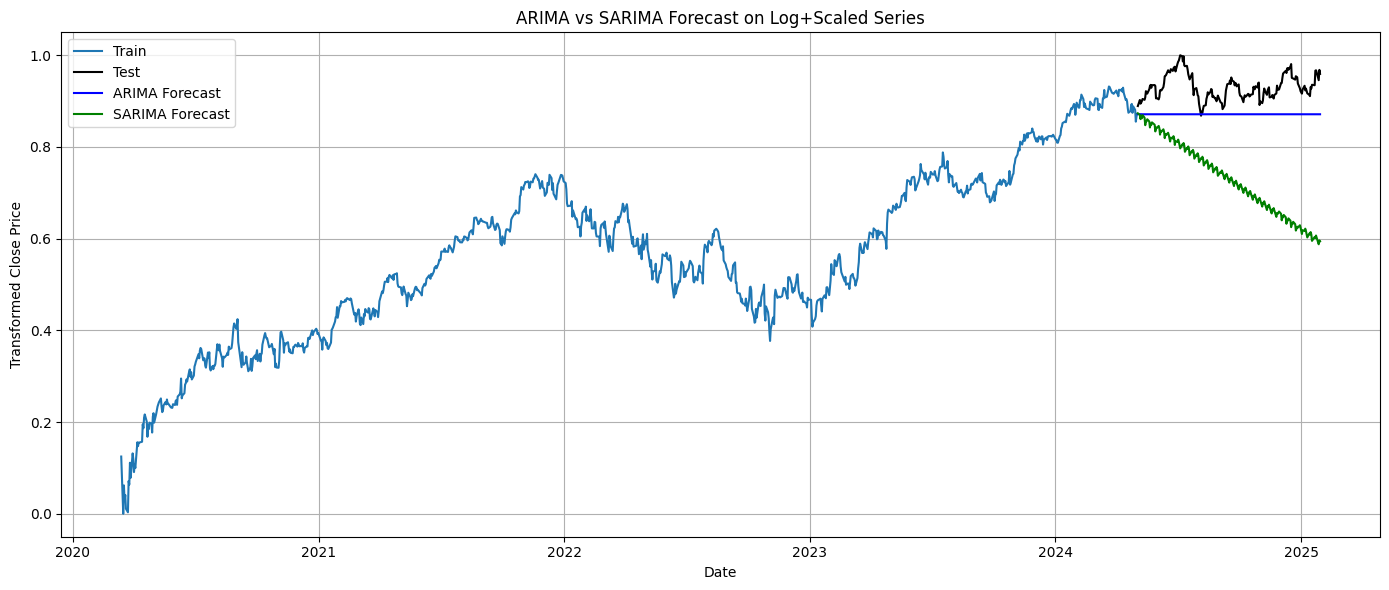

({'MSE': 0.004226843594682604,
  'MAE': 0.05921812938361056,
  'R²': -4.840043453990212},
 {'MSE': 0.04681464457865639,
  'MAE': 0.19861624704905045,
  'R²': -63.6817305864828})

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ARIMA model (1,1,1) on log+scaled data
arima_model = ARIMA(ts_train_scaled, order=(1, 1, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(ts_test_scaled))

# SARIMA model (1,1,1)(1,1,0,5) as a starting config
sarima_model = SARIMAX(ts_train_scaled, order=(1, 1, 1), seasonal_order=(1, 1, 0, 5))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.forecast(steps=len(ts_test_scaled))

# Evaluate both models
def evaluate(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R²": r2_score(y_true, y_pred)
    }

arima_metrics = evaluate(ts_test_scaled, arima_forecast)
sarima_metrics = evaluate(ts_test_scaled, sarima_forecast)

# Plot forecasts
plt.figure(figsize=(14, 6))
plt.plot(ts_train_scaled, label='Train')
plt.plot(ts_test_scaled, label='Test', color='black')
plt.plot(ts_test_scaled.index, arima_forecast, label='ARIMA Forecast', color='blue')
plt.plot(ts_test_scaled.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title("ARIMA vs SARIMA Forecast on Log+Scaled Series")
plt.xlabel("Date")
plt.ylabel("Transformed Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

arima_metrics, sarima_metrics


#LSTM

In [ ]:
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import BayesianOptimization

<ipython-input-3-d292747a5cab>:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import BayesianOptimization


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ['High', 'Low', 'Open', 'Volume', 'VWAP', 'Adjusted_Close', 'Market_Cap', 'SMA_50', 'EMA_50', 'RSI', 'MACD']
target = 'Close'

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(msft[features + [target]]), columns=features + [target], index=msft.index)

# Prepare sequences for LSTM
def create_sequences(data, feature_cols, target_col, time_steps=60):
    np.random.seed(42)
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[feature_cols].iloc[i:i+time_steps].values)
        y.append(data[target_col].iloc[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
X, y = create_sequences(df_scaled, features, target, time_steps)

from sklearn.model_selection import train_test_split

# Step 1: First split into temp (85%) and test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, shuffle=False, random_state=42)

# Step 2: Split temp into train (70%) and validation (15%)
# Note: 15% / 85% ≈ 0.1765 — so we split 17.65% from temp to get 15% of total as val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, shuffle=False, random_state=42)


# # Build the LSTM model
# model = Sequential([
#     LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dropout(0.2),
#     LSTM(50, return_sequences=False),
#     Dropout(0.2),
#     Dense(25, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# # Make predictions
# predictions = model.predict(X_test)

# # Inverse transform the predictions to the original scale
# predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions.reshape(-1, 1)), axis=1))[:, -1]
# y_test_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]



In [ ]:
X_train.shape, X_val.shape, X_test.shape

((816, 60, 11), (175, 60, 11), (176, 60, 11))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch

# Define the model function for tuning
def build_model(hp):
    model = Sequential([
        LSTM(hp.Int('units1', min_value=50, max_value=200, step=50), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])),
        LSTM(hp.Int('units2', min_value=50, max_value=200, step=50), return_sequences=False),
        Dropout(hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])),
        Dense(25, activation=hp.Choice('activation', ['relu', 'tanh'])),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials= 5,  # Number of different models to try
    executions_per_trial=1,  # Number of times to train each model
    directory='lstm_tuner',
    project_name='stock_prediction'
)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate
best_model.evaluate(X_test, y_test)


Trial 5 Complete [00h 03m 20s]
val_loss: 0.0003366566088516265

Best val_loss So Far: 0.0003366566088516265
Total elapsed time: 00h 10m 29s
Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 310ms/step - loss: 0.0688 - val_loss: 0.0079
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - loss: 0.0032 - val_loss: 0.0052
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 297ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - loss: 0.0012 - val_loss: 0.0050
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - loss: 0.0013 - val_loss

0.0009857065742835402

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score



In [ ]:
import numpy as np
# # Evaluate the model on the training data
# train_predictions =best_model.predict(X_train)
# train_predictions_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], train_predictions.reshape(-1, 1)), axis=1))[:, -1]
# y_train_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], y_train.reshape(-1, 1)), axis=1))[:, -1]
# For test data
test_predictions =best_model.predict(X_test)
y_test_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]
predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predictions.reshape(-1, 1)), axis=1))[:, -1]

# train_mse = mean_squared_error(y_train_inv, train_predictions_inv)
# train_rmse = np.sqrt(train_mse)
# train_r2 = r2_score(y_train_inv, train_predictions_inv)

# print(f"Training Accuracy (R-squared): {train_r2}")
# print(f"Training MSE: {train_mse}")
# print(f"Training RMSE: {train_rmse}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step


In [ ]:
import matplotlib.dates as mdates


In [ ]:
import pandas as pd

# Assuming your date column is named 'Date'
msft['Date'] = pd.to_datetime(msft['Date'])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

Evaluation Metrics for Best Model:

                           Metric       Value
0        Mean Squared Error (MSE)  110.774982
1  Root Mean Squared Error (RMSE)   10.524969
2                  R-squared (R2)    0.483209

Best Model - Testing Accuracy (R-squared): 0.48320928251087525
Best Model - Testing MSE: 110.77498151167111
Best Model - Testing RMSE: 10.524969430438794


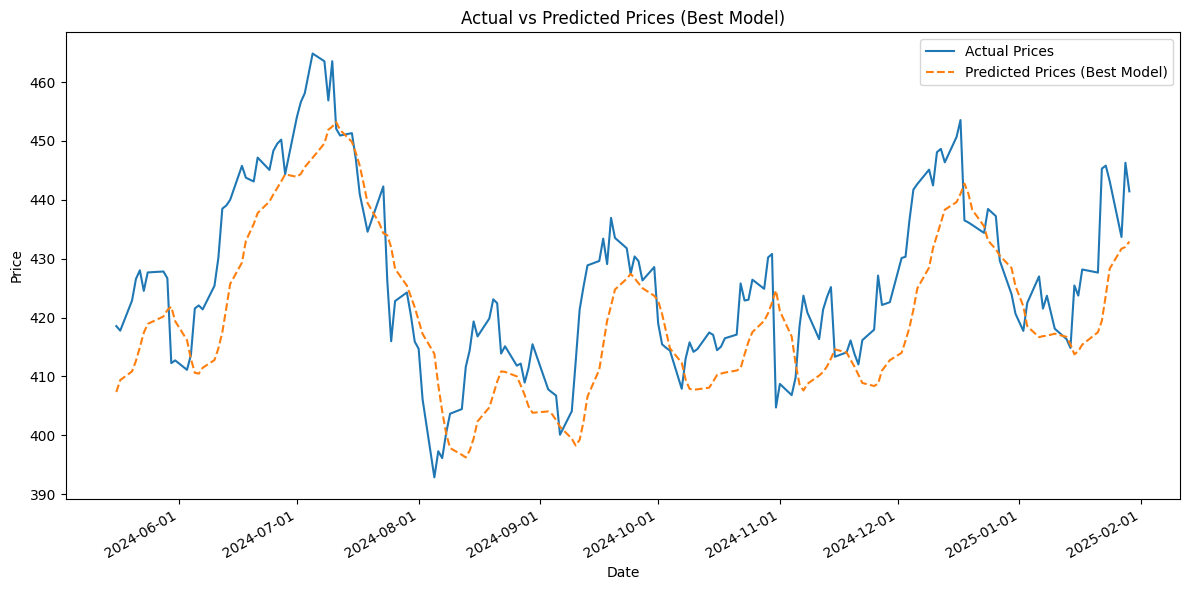

In [ ]:
# prompt: generate the code the error metric just like model2 for my best model as well

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make predictions with the best model
best_predictions = best_model.predict(X_test)

# Inverse transform the predictions to the original scale
best_predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], best_predictions.reshape(-1, 1)), axis=1))[:, -1]

# Calculate evaluation metrics for the best model
best_mse = mean_squared_error(y_test_inv, best_predictions_inv)
best_rmse = np.sqrt(best_mse)
best_r2 = r2_score(y_test_inv, best_predictions_inv)

# Create a table of evaluation metrics for the best model
best_evaluation_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Value': [best_mse, best_rmse, best_r2]
})

print("\nEvaluation Metrics for Best Model:\n")
print(best_evaluation_metrics)

# # Evaluate the best model on the training data
# best_train_predictions = best_model.predict(X_train)
# best_train_predictions_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], best_train_predictions.reshape(-1, 1)), axis=1))[:, -1]

# best_train_mse = mean_squared_error(y_train_inv, best_train_predictions_inv)
# best_train_rmse = np.sqrt(best_train_mse)
# best_train_r2 = r2_score(y_train_inv, best_train_predictions_inv)

# print(f"\nBest Model - Training Accuracy (R-squared): {best_train_r2}")
# print(f"Best Model - Training MSE: {best_train_mse}")
# print(f"Best Model - Training RMSE: {best_train_rmse}")

print(f"\nBest Model - Testing Accuracy (R-squared): {best_r2}")
print(f"Best Model - Testing MSE: {best_mse}")
print(f"Best Model - Testing RMSE: {best_rmse}")

#Plot for the best model
plt.figure(figsize=(12, 6))
plt.plot(msft['Date'].iloc[-len(y_test):], y_test_inv, label="Actual Prices")
plt.plot(msft['Date'].iloc[-len(y_test):], best_predictions_inv, label="Predicted Prices (Best Model)", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs Predicted Prices (Best Model)")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


In [ ]:
preds_2 = best_model.predict(X_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


In [ ]:
from sklearn.metrics import r2_score

# # Training R-squared
# train_preds = model.predict(X_train)
# train_r2 = r2_score(y_train, train_preds)
# print(f"Training R-squared: {train_r2}")


val_r2 = r2_score(y_val, preds_2)
print(f"Validation R-squared: {val_r2}")

Validation R-squared: 0.9577290268800458
